<a href="https://colab.research.google.com/github/Camel-light/Assignments/blob/main/Copy_of_questions_chapter2_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab2/kc_house_data.csv")

data.head(10)

Mounted at /content/drive


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

Answer:

A pipeline is a sequence of data processing components. They are common in ML. Basically, the data is given to one component as an input, processed it and then sent out as output - which will be the input of the next component until we reach the last output. Each component is quite self-contained, and a team can work on just one component. It makes the architeture robust, because since it ofte runs asynchonously, if a component brakes, the floowing ones can keep working at least for some time. However, if an error stays unnoticed without monitoring, this can obviously distort all the downstream part after the defective component. 


Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

Answer:

This is clearly a  supervised learning task, as we have a labeled training-set (each instance comes with the expected output, i.e., the district’s median housing price).
It is a regression task, the model will be asked to predict the price. Moreover, this is a multiple regression problem, the system will use multiple features to make a prediction ( district’s population, median income, ...). 
It is an univariate regression, since we are only predicting a single value for each district. If we were trying to predict multiple values per district, it would be a multivariate regression.
Finally, there is no continuous flow of data coming into the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.
[Hands_On_Machine_Learning_with_Scikit_Learn_Keras_and_TensorFlow_Third_Edition, chapter 2]

What is a performance measure? 
Answer:
A performance measure gives an idea of how much error the system typically makes in its predictions.

Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?

Answer:
1. The RMSE stands for "Root means quare error". It measures the suqare root of the squared distances between each predicted value and the real value, dividing by the total number of values (or numbers of instances). Squaring the distances makes them all positive, so that they can be measured in absolute terms, and gives more weight to large values and less to small ones, as the quadratic function is below the 45° line (f(x)=x) between {0,1}, and above it for larger values.
Therefore it is useful if there are just a few outliers, as they would otherwise be weighted a lot.

The formula is: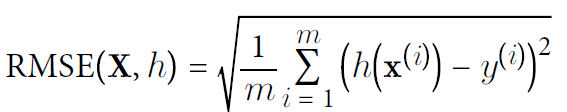

Where:
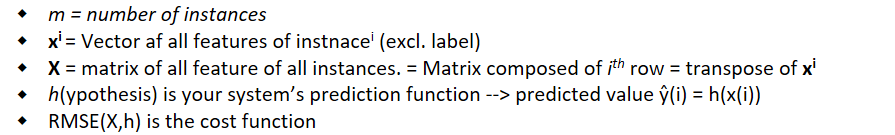

2. The mean absolut error (MAE):
It is similar to the RMSE, but taking the absolut value of the differences between predictions and obervations, without squaring them nor taking the suare root of it all.
It is more adapted to cases where there are more outliers as the distances get all weighted the same.
Its formuls is:
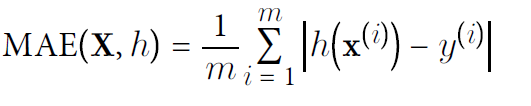

In a linear regression the measures of  performance can be interpreted as the accuracy of the model, as the average distance from the actual values. In the case of RMSE larger outliers get weithted more, as seen above. Smaller values indicate better model performance.
Since we are trying to make predictions in a regression model the performance measures indicate how precise those predictions are.

##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

Answer:
Variable types:
categorical, ordinal, or numeric

 * index: ordinal
 * date: can be considered ordinal
 * price: numeric
 * bedrooms: numeric
 * bathrooms:numeric
 * sqft_living: numeric
 * sqft_lot: numeric
 * floors: numeric / categorical
 * waterfront: categorical
 * view: categorical / ordinal
 * condition: ordinal
 * grade: ordinal
 * sqft_above: numeric
 * sqft_basement: numeric
 * yr_built: categorical / numerical / ordinal (depends on usage)
 * yr_renovated: categorical / numerical / ordinal (depends on usage)
 * zipcode: categorical
 * lat:numeric
 * long:numeric

The date variable can be considered ordinal if used to sort the data according to when it was entered. Floors is numeric, but can be used as categorical as there are just a few different values and it could be used to categorize houses. View assumes values {0,4}, it looks more like categorical if it means North, Eas, West, Sout, no-view; or ordinal if it ranks the quality of the view. Finally, yr_built and yr_renovated can be of different categories depending their usage / interpretation.


Comparing yr_renovated and waterfront, we notice that waterfront has just 2 values: 0,1 and is a classical categorical variable, while yr_renovated has 70 different values and can thus be considered categorical, but also numerical or ordinal since it could measure time.

In [ ]:
data.head(10)


In [4]:
data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

In [34]:
print(data["waterfront"].value_counts())
print("------")
print(data["yr_renovated"].value_counts())

0    17163
1      127
Name: waterfront, dtype: int64
------
2014    519
2005    383
2006    383
2003    366
2007    363
       ... 
1901     22
1902     21
1933     19
1935     16
1934     11
Name: yr_renovated, Length: 116, dtype: int64


Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

Answer:
Yes, some distributions are skewed.

Right skew: price, bedrooms, bathrooms, sqft_living, sqft_lot, waterfront, view, sqft_above, sqft_basement, yr_renovated, long

Left skew: yr_built, lat

Not skewed: floors, condition, grade (slightly to right), zipcode


yr_renovated: we notice most items have value 0, which suggest they were not renovated.

The scales of the variables clearly differ: some are between {0,1} while others {0, 12500+}

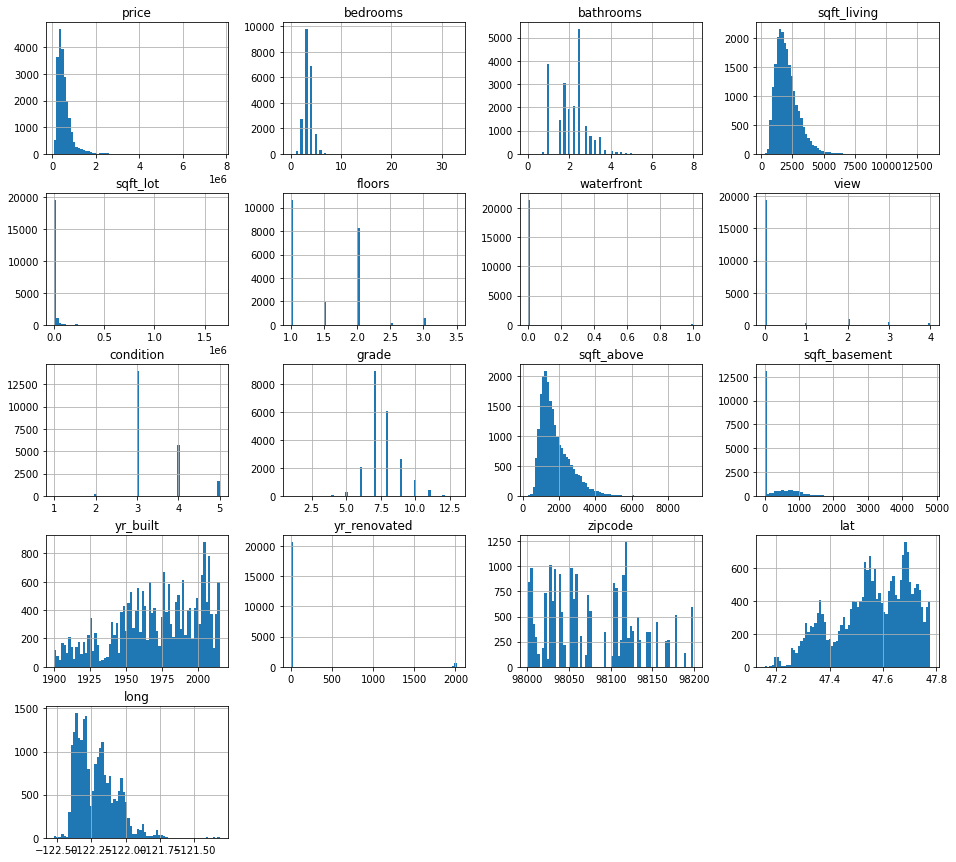

In [7]:
import matplotlib.pyplot as plt
data.hist(bins=70, figsize=(16,15))
plt.show()

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Answer: We could use the median or the mean year of yr_renovated that are available. Alternatively, we could use the year the house was built.

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [8]:
# Some Data Cleaning

data['renovated'] = pd.cut(data['yr_renovated'].clip(0,1), bins=[-1, 0, float('inf')], labels=[0, 1]).astype(int)
print(data["renovated"].value_counts())  # 0 = 20699 it's the same as before
data['yr_renovated'] = data[['yr_renovated', 'yr_built']].max(axis=1)
data['date'] = pd.to_datetime(data['date'])

0    20699
1      914
Name: renovated, dtype: int64


##Create a Test Set

Try to explain what a *stratified sampling* is.

Answer: 

stratified sampling is used to ensure that the dataset is representative of the population. For example, if the population is 50/50 - males/females, it is necessary to have a representative sample. To do so, the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.


Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

In [9]:
from sklearn.model_selection import train_test_split
data["price_cat"] = pd.cut(np.log(data["price"]), bins=5, labels=[1, 2, 3, 4, 5])

train_set, test_set = train_test_split(data, test_size=0.2, stratify=data["price_cat"], random_state=42)

train_set = train_set.copy()
test_set = test_set.copy()

In [10]:
data = train_set.copy()
data.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,price_cat
17720,2014-09-09,559900.0,5,3.00,2200,6380,1.0,0,0,3,7,1440,760,1987,1987,98125,47.7033,-122.322,0,3
12734,2015-04-24,335000.0,2,1.00,1800,8900,1.0,0,0,3,6,900,900,1945,1945,98168,47.5100,-122.323,0,2
15394,2014-08-01,635000.0,4,1.75,2460,7560,2.0,0,0,4,8,2460,0,1952,1952,98177,47.7256,-122.367,0,3
15555,2015-04-14,175000.0,3,1.00,1460,11880,1.0,0,0,2,7,1460,0,1961,1961,98030,47.3762,-122.219,0,1
5979,2014-07-31,275000.0,3,1.50,1900,9737,1.0,0,0,4,7,1200,700,1968,1968,98031,47.4125,-122.207,0,2
12829,2014-08-25,727000.0,4,3.00,3150,9703,2.0,0,0,3,9,3150,0,2001,2001,98075,47.5962,-122.018,0,3
698,2014-06-10,225000.0,3,1.75,1760,26055,1.0,0,0,3,7,920,840,1979,1979,98042,47.3664,-122.100,0,2
20809,2014-09-17,799900.0,4,4.00,3650,18223,2.0,0,3,3,9,3330,320,2013,2013,98006,47.5442,-122.116,0,3
13830,2014-11-24,356000.0,2,1.00,1430,365904,1.0,0,0,3,7,1010,420,1991,1991,98065,47.5130,-121.857,0,2
20679,2014-06-13,795000.0,4,3.50,3200,3250,2.0,0,0,3,9,2670,530,2007,2007,98029,47.5515,-122.000,0,3


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

Answer:

The expensive houses are located mostly on the upper right-center, between latitude 47.7 and 47.5 where the color is green to reddish (blue is cheaper).
To combine the 'lat' and 'long' features into a simpler feature, we could create a new feature that represents the distance of each house from a central point, such as the city center. This  feature could be used to cluster the houses into groups based on their proximity to each other.

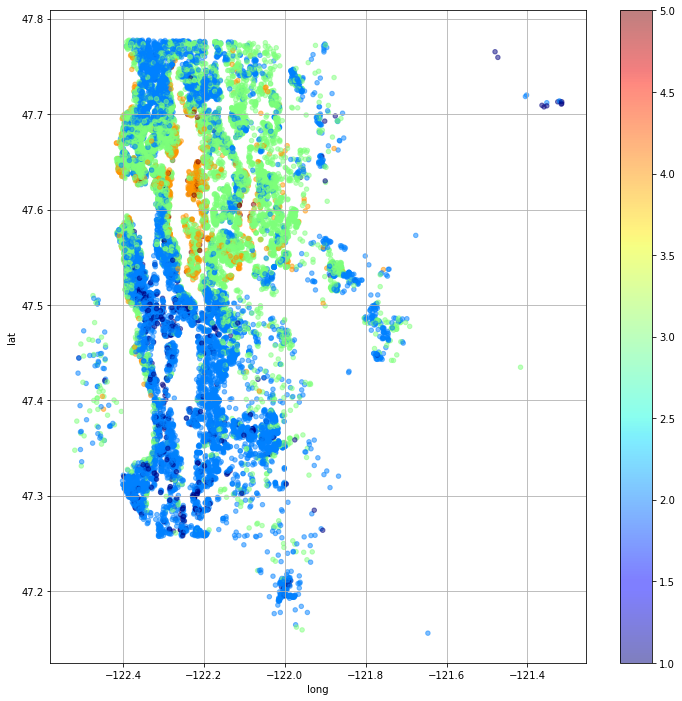

In [11]:
data.plot(kind="scatter", x="long", y="lat", grid=True, c=data['price_cat'], cmap='jet', alpha=0.5, colorbar=True,
 legend=True, sharex=False, figsize=(12,12))

plt.show()


### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*.

How can the values of this correlation effect be interpreted?
What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

Answer:

The correlation coefficient ranges from –1 to 1. A negative correlation indicates that as one variable increases, the other decreases, and vice-versa. 0 correlation indicates that there is no linear correlation. Obviously the correlation between price and itself is 1. With sqft_living it's 0.7, which makes sense as the price increases as the sqfts increase. Although as stated in the textbook:" It may completely miss out on nonlinear relationships (e.g., “as x approaches 0, y generally goes up”)"

Being sorted in descending order the ones with the stronghest correlation are: sqft_living, grade, sqft_above, bathrooms. Slightly less for the following ones. The threshold for what correlation is relevant depends on the context, in social sciences correlations are generally lower and thus considered significant at lower values. In other domains, higher correlation are used. Some correlations which do not make sense are zip code as the value gets confused as a correlation, while it is actually a category.

In [12]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.699149
grade            0.666223
sqft_above       0.602110
bathrooms        0.522416
view             0.397593
sqft_basement    0.318284
bedrooms         0.307806
lat              0.305278
waterfront       0.269959
floors           0.255981
renovated        0.123088
yr_renovated     0.104945
sqft_lot         0.089478
yr_built         0.054338
condition        0.038804
long             0.023777
zipcode         -0.062635
Name: price, dtype: float64

Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function.

What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

Answer:
sqft_living: good positive correlation as seen by the diagonal distribution of data. Stronger correlation of price - sqfts for lower prices, tends to get weaker for higher prices. Which makes sense empirically.

sqft_above:Similar to sqft_above, with even higher dispertion of data (weaker correlation) of sqft to price as sqfts increase.

sqft_basement: We can notice from values where the sqfts of the basement is 0 that the distripution of points increases vertically, this could be because flats without a basement don't correlatre with price obviously. When there is a basement the correlation exists, but is not that strong, which makes sense empirically as people don't focus to much on living in the basement!

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='grade', ylabel='price'>,
        <Axes: xlabel='sqft_above', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='view', ylabel='price'>,
        <Axes: xlabel='sqft_basement', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living'>,
        <Axes: xlabel='grade', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_above', ylabel='sqft_living'>,
        <Axes: xlabel='bathrooms', ylabel='sqft_living'>,
        <Axes: xlabel='view', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_basement', ylabel='sqft_living'>],
       [<Axes: xlabel='price', ylabel='grade'>,
        <Axes: xlabel='sqft_living', ylabel='grade'>,
        <Axes: xlabel='grade', ylabel='grade'>,
        <Axes: xlabel='sqft_above', ylabel='grade'>,
        <Axes: xlabel='bathrooms', yl

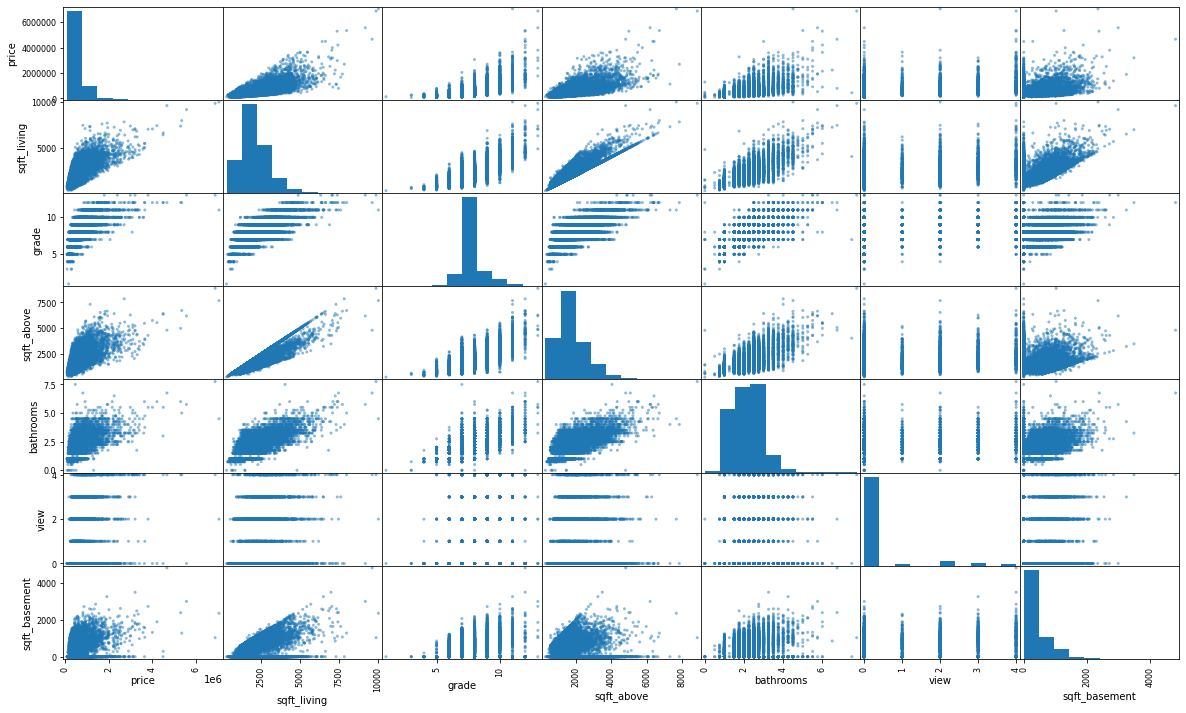

In [13]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms','view', 'sqft_basement']
scatter_matrix(data[attributes], figsize=(20, 12))

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [14]:
data['bedroom_density'] = data['bedrooms'] / data['sqft_living']
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
sqft_living        0.699149
grade              0.666223
sqft_above         0.602110
bathrooms          0.522416
view               0.397593
sqft_basement      0.318284
bedrooms           0.307806
lat                0.305278
waterfront         0.269959
floors             0.255981
renovated          0.123088
yr_renovated       0.104945
sqft_lot           0.089478
yr_built           0.054338
condition          0.038804
long               0.023777
zipcode           -0.062635
bedroom_density   -0.467030
Name: price, dtype: float64

##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [15]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

###Missing Data

What options do we have to deal with missing values? What options do we have to deal with missing values? 

Answer:

ML algorithms are not good at dealing with missing values, hance they have to be taken care of. There are different options:

- Get rid of the attribute (column) where the value is missing, this might forces us to delete other records (rows) for which we do have the data and this might be a waste.

- Delete the row where the data is missing, this has the same negative side-effects as the first option, although usually columns have more rows, than rows have columns, and so we would lose less data.

- Replace the data with a synthetic measure of the data, that  we do have such as the various types of means, medians, etc.. ("Imputation"). A way to generate values for imputation is "interpolation": we can try to predict the missing value by the knowledge we have about other variables where the data is not missing, and recreate the missing value with the function we know.

Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

Answer:

The Scikit-Learn class SimpleImputer is used to impute missing values in datasets. It has the benefit of storing the median value of each feature, which allows it to impute missing values not only in the training set but also in the validation set, test set, and any new data fed to the model. To use it, a SimpleImputer instance needs to be created. It will use the imputation strategy median, this will impute missing values in the dataset by replacing them with the median value of the corresponding feature.

In [46]:
mask = data.isnull().any(axis=1)
data[mask]


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,price_cat


###Handling Text and Categorical Attributes


What are ordinal and categorical data? Do we have such data in our data set? 

Answer:

Ordinal data is a data that has a natural ranking. This means that the data can be ordered or ranked based on some logic. For example, the level of education can be classified as "High School Diploma", "Bachelor", "Master".

Categorical data, is a data that can be divided into distinct groups or categories. It cannot be ranked in any specific order, and the values have no inherent numerical meaning. Sometimes categorical variable can also be ordered, like color is a classical categorical variable, but it can be ordered, for example, as "degree of brightness".

Some example from our dataset: 

waterfront: categorical


view: categorical / ordinal


condition: ordinal

What possibilities do we have to transform this data correctly? 

Answer:

1. Encode categories to numerical values: Mapping each unique categorical value to a numerical value. E.g.: a feature like "color" with values "red", "green",  could be encoded like this: "red" as 1, "green" as 2.... 

2. Another option is to use one-hot encoding to create matrixes ("sparse" or "dense"). This means creating a vector for each unique categorical value, where the vector has a 1 in the position corresponding to the categorical value and 0s in all other positions.


What are dummy attributes?


Answer:

 They are binary variables that represent the presence or absence of a categorical value in a dataset. They are used to encode categorical data for analysis.


 Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

 Answer:

The OneHotEncoder() function is used to perform one-hot encoding on categorical variables, such as in  the case of 'waterfront' in our dataset. The 'waterfront' variable,  has two categories ('0' for no waterfront and '1' for waterfront), OneHotEncoder() will create two binary variables: one for '0' and another for '1'. Each observation in the dataset will be represented by a row of zeros and ones, with a one in the column corresponding to the category of the original variable.

In [17]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder().fit(data[['waterfront']])
waterfront_encoded = cat_encoder.transform(data[['waterfront']])

##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

Answer:

Min-max scaling and standardization are two  techniques used in ML to preprocess features before training a model. This will optimize the process. 

Min-max scaling is a method of normalizing the values of a numerical feature to a range between 0 and 1. This is done by subtracting the minimum value of the feature and then dividing by max-min.

Standardization transforms the values, such that they have a mean of 0 and a standard dev. of 1, (like in the standard normal distribution). This is done by subtracting the mean of the feature and then dividing by the standard deviation.
standardization = (x - mean(x)) / sdev(x)

A heavy tail in a distribution refers to a distribution where the tail (e.g., the values on the high end of the distribution) is longer and has more extreme values than a normal distribution. In other words, a heavy-tailed distribution has more outliers.
When using min-max scaling or standardization on a heavy-tailed distribution, we night get problems, because these techniques assume that the data is normally distributed or has a similar spread of values. However, in a heavy-tailed distribution, the presence of outliers or extreme values can greatly affect the scaling or standardization process. This can result in features that are improperly scaled or standardized, which can worsen the performance of ML.

Example: we have a dataset with a numerical feature that has a heavy-tailed distribution, with a few extreme values at the high end of the distribution.
In the case of min-max scaling, the presence of extreme values may cause the resulting scaled values to be biased towards 0 or 1.
In the case of standardization, the presence of extreme values may cause the standardized values to be skewed towards the mean.

In [18]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated', 'price_cat'],
      dtype='object')

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess!

Answer:

For numeric variables, such as the house price, square footage, number of bedrooms, and number of bathrooms, it is recommended to perform feature scaling. 

For categorical variables, such as grade or waterfront status, feature scaling is not necessary as they are already in a categorical form. However, it may be necessary to encode them as numerical variables. This can be done using techniques such as one-hot encodinge.

For those which can be summarized into groups such as  zipcode, lat, long clustering would be useful.
 * index: ordinal
 * date: can be considered ordinal
 * price: numeric
 * bedrooms: numeric
 * bathrooms:numeric
 * sqft_living: numeric
 * sqft_lot: numeric
 * floors: numeric / categorical
 * waterfront: categorical
 * view: categorical / ordinal
 * condition: ordinal
 * grade: ordinal
 * sqft_above: numeric
 * sqft_basement: numeric
 * yr_built: categorical / numerical / ordinal (depends on usage)
 * yr_renovated: categorical / numerical / ordinal (depends on usage)
 * zipcode: categorical
 * lat:numeric
 * long:numeric


 Try to understand the following two code blocks, how are the variables *long* and *lat* converted?

 Answer:

 The ClusterSimilarity is a  transformer that uses he KMeans clustering  to group similar data points, based on their geographical coordinates (long and lat).

The KMeans model is trained on the input data , using the fit function, and the resulting clusters are stored in the self.kmeans_ attribute.

In the transform method, the data is transformed to a matrix of cluster similarities using the radial base function (rbf_kernel) with the gamma parameter. The resulting similarity matrix is returned.

The get_feature_names_out method returns a list of feature names for the transformed data. In this case, the feature names are the cluster indices with a prefix "Cluster" and a suffix similarity.

long and lat are not converted, they are used as input to the clustering , which assigns each data point to a cluster.

The maximum similarity value for each data point is computed by calling similarities.max(axis=1) and stored in the data_renamed DataFrame. This maximum similarity value represents the degree of similarity, and is used to color-code the data points, by using cmap="jet".


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


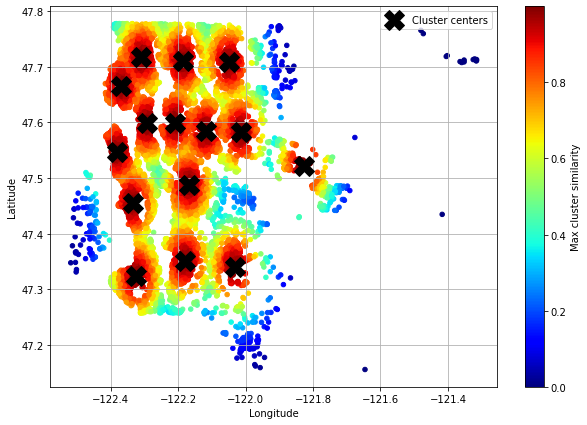

In [20]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made?

Answer:

1. pipeline  is the date_pipeline, which converts a date column in the input data to the number of seconds between the current time and the date. The resulting values are then standardized using StandardScaler.

2. pipeline  is cluster_simil, it performs clustering on the latitude and longitude columns of the input data. The resulting cluster labels are used as features in the machine learning model.

3. pipeline  is default_num_pipeline, which standardizes numeric columns using StandardScaler.

4. pipeline  is log_pipeline, it takes the logarithm of numeric columns and standardizes the resulting values using StandardScaler.

5. pipeline  is label_pipeline, which takes the logarithm of of the target variable and does not apply any further transformations.

6. pipeline  is cat_pipeline, it applies one-hot encoding to categorical columns.

What arguments are in favor, and what arguments might be against?

Answer:

Arguments in favor of using these pipelines are that they can efficiently preprocess a dataset.

Arguments against using these pipelines might be that they can introduce information loss.

After a  brief reaserch, I found another approach is to use automated machine learning (AutoML) tools such as TPOT or Auto-sklearn. These can automatically search over a large space of potential preprocessing pipelines and machine learning models to find the best combination for a given dataset and problem. These tools can be especially useful for those with limited experience.

 How would you convert the variables if you compare it with your guess?

 Answer:

 My guess of using clustering for lat, long turned out to be correct.

 

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

Answer:

31

In [22]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


(17290, 31)

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

In [23]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

Answer:

The model performs moderately, as the median values are good. The median value is 450000.00000000035, and the predicted median value by the model is 458481.4. This indicates that the model tends to slightly overestimate the home prices, as the predicted median is higher than the actual median. Moreover, The RMSE of 145779.7 is a poor measure for the model quality. The median absolute error is 50.287, which means that on average, the model's predictions are off by approximately $50,287.46.  

In [24]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

median_hat = np.median(np.exp(data_predictions))
median = np.median(np.exp(data_label_transformed))

median_absolute_error = median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions))
root_mean_squared_error = mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared=False)



print("median:",median)
print("predicted median:", median_hat)
print("mean absl error:", median_absolute_error)
print("root mean square error:", root_mean_squared_error)

median: 450000.00000000035
predicted median: 458481.45317789563
mean absl error: 50287.4608023848
root mean square error: 145779.74056502635


###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation?

Answer:

Scikit-Learn has a feature called "k_-fold cross-validation" . It randomly splits the training set into 10 nonoverlapping subsets called folds,
then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training.

Why have I adjusted the R squared error with a separate function?

Answer:


If a model that uses logarithmic transformation, the dependent variable has been transformed to a logarithmic scale. This means that the traditional R squared, which is based on the untransformed dependent variable, would not be an appropriate.

The adjusted R squared takes the logarithmic scale and the number of independent variables into account, while penalizing for the number of independent variables. This makes it a useful for a model that uses logarithmic scale. By using the negative square root of the mean of the squared errors on the exponential scale as a scoring function, we are penalizing the model for large errors on the original scale.


 What is the function *np.ravel* doing?

 Answer:

 The np.ravel() function from NumPy is used to flatten an array / matrix into a one-dimensional array. Now it can be used by models that require a one-dimensional target variable, such as scikit-learn's RandomForestRegressor.



In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, t

The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

Answer:

The mean RMSE across all folds is approximately -127263.08, which is significantly lower than the RMSE obtained from the linear regression model (145779.74). This suggests that the random forest model is performing better than the linear regression model on this dataset. Additionally, the standard deviation of the RMSEs is relatively small (9137.64), which indicates that the performance of the model is consistent across different folds of the cross-validation process.

In [26]:
pd.Series(forest_rmses).describe()

count        10.000000
mean    -127543.058381
std        9135.169429
min     -142753.567494
25%     -130268.289114
50%     -126909.800528
75%     -122363.197511
max     -113876.572283
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do.

Answer:

Grid Search and Random Search are methods for hyperparameter tuning.
Grid Search involves creating a grid of all possible hyperparameter values and then searching through that grid to find the optimal combination.

This method is easy to implement, but it can be  computationally expensive when dealing with a large number of hyperparameters or a large range of hyperparameter values.

Random Search, involves randomly sampling hyperparameters from a specified distribution and evaluating the model performance at each set of hyperparameters.

 What are the advantages of each method. 
 
 Answer:

 Grid Search:

- Exhaustive search: Explores all the possible combinations of hyperparameters in the search space.

- Easy to implement: Relatively simple to implement and does not require any complex coding or optimization algorithms.

- Clarity: produces clear and interpretable results.

Random Search:

- More efficient: More efficient than Grid Search, especially when the search space is large.

- Better results: May bring better results than Grid Search because it can explore more diverse hyperparameter combinations.

- It is possible that a combination of hyperparameters that are not adjacent in the search space can perform better than a combination that is adjacent.

- Flexibility: Random Search is more flexible.
 
 For which parameters would this make sense in our example?

 Answer:

We could use Grid Search /  Random Search to tune hyperparameters such as the regularization strength for the linear regression model or "n_estimators", "max_features", "max_depth" for the random forest model.

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [27]:
test_label_transformed = preprocessing_label.fit_transform(test_set[["price"]].copy())

final_predictions = forest_reg.predict(test_set.drop("price", axis=1))

m_a_e = median_absolute_error(np.exp(test_label_transformed), np.exp(final_predictions))
r_m_s_e = mean_squared_error(np.exp(test_label_transformed), np.exp(final_predictions), squared=False)


median_hat = np.median(np.exp(test_label_transformed))
median = np.median(np.exp(final_predictions))

print("Root mean squared error:", r_m_s_e)
print("Mean absolut error:", m_a_e)
print("predicted median:", median_hat)
print("median:", median)

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


TypeError: ignored

##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Monitoring is necessary, to verify performance on updated data or ir we need to train it again.

Try to save the weights of our model so that we can reload it at any time, without having to run the training again.

In [ ]:
from joblib import dump, load

# Save the model
dump(forest_reg, 'regression_model_housing_prices')



##Ideas for the Learning Portfolio
## I will but now it's 1:30AM ✌️
1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 